<a href="https://colab.research.google.com/github/Iksora03/Deep-Learning/blob/master/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os 
sets = ['train', 'test', 'validation']
counts = dict()

for s in sets:
  root = '/content/drive/My Drive/tomato'.format(s)
  for d in os.listdir(root):
    directory = '{}/{}'.format(root, d)
    number_of_files = len(os.listdir(directory))
    counts.setdefault(d, 0)
    counts[d] += number_of_files

for f, c in counts.items():
  print(f, '->' ,c)

valid -> 30
train -> 30


In [0]:
get_ipython().system_raw("unrar x datasets.rar")

In [0]:
import os
import numpy as np
import cv2
import random

In [5]:
from keras import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.applications import vgg16
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet_pi
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import keras

Using TensorFlow backend.


In [6]:
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = True

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 13s 0us/step


In [0]:
x = base_model.output
x = Flatten(name='flatten', input_shape=base_model.output_shape)(x) 
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(inputs=base_model.input, outputs=x)
# model.summary()

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [10]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/tomato/train', 
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/tomato/valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
)

Found 18409 images belonging to 10 classes.
Found 4602 images belonging to 10 classes.


In [0]:
import tensorflow as tf

In [12]:
# do not rerun
from keras.models import Sequential
t_steps = 500 // 32
v_steps = 80 // 32
history = model.fit_generator(train_generator, 
                              epochs=50, 
                              workers = 4,
                              use_multiprocessing=True,
                              steps_per_epoch=t_steps, 
                              validation_data=validation_generator,
                              validation_steps=v_steps,
                             )

Epoch 1/50
15/15 [==============================] - 208s 14s/step - loss: 6.2348 - accuracy: 0.3271 - val_loss: 44648.6562 - val_accuracy: 0.1094
Epoch 2/50
15/15 [==============================] - 178s 12s/step - loss: 3.8186 - accuracy: 0.4958 - val_loss: 161.0034 - val_accuracy: 0.0625
Epoch 3/50
15/15 [==============================] - 178s 12s/step - loss: 2.3709 - accuracy: 0.5646 - val_loss: 1390.2087 - val_accuracy: 0.1406
Epoch 4/50
15/15 [==============================] - 180s 12s/step - loss: 1.9304 - accuracy: 0.6042 - val_loss: 2353.7939 - val_accuracy: 0.1250
Epoch 5/50
15/15 [==============================] - 177s 12s/step - loss: 1.6169 - accuracy: 0.6104 - val_loss: 224.4603 - val_accuracy: 0.1094
Epoch 6/50
15/15 [==============================] - 177s 12s/step - loss: 2.1873 - accuracy: 0.5875 - val_loss: 1431.0583 - val_accuracy: 0.1875
Epoch 7/50
15/15 [==============================] - 180s 12s/step - loss: 1.1434 - accuracy: 0.6792 - val_loss: 3.9867 - val_accura

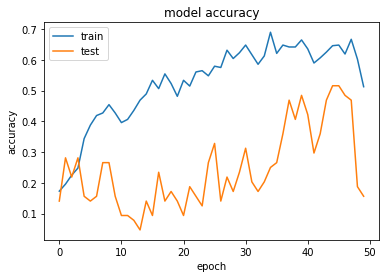

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

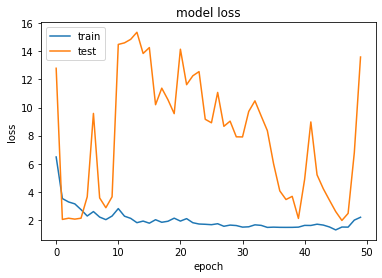

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()